<a href="https://colab.research.google.com/github/SanskarVaibhav/.ipython/blob/main/Sanskar_Vaibhav(22SCSE1180236)_SOFT_COMPUTING_Labwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(1) Write a program to perform Union, Intersection and Complement operations.**         Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import numpy as np

# Enter Data
u = np.array(eval(input('Enter First Matrix (as a list of lists, e.g., [[1,2],[3,4]]): ')), dtype=float)
v = np.array(eval(input('Enter Second Matrix (as a list of lists, e.g., [[1,0],[0,1]]): ')), dtype=float)

# To Perform Operations
w = np.maximum(u, v)  # Union
p = np.minimum(u, v)  # Intersection
q1 = 1 - u            # Complement of the first matrix
q2 = 1 - v            # Complement of the second matrix



# Display Output
print('Union Of Two Matrices')
print(w)
print('Intersection Of Two Matrices')
print(p)
print('Complement Of First Matrix')
print(q1)
print('Complement Of Second Matrix')
print(q2)

**(2) Generate AND/OR function using McCulloch-Pitts neural net.**
Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
def mcculloch_pitts_neuron(inputs, weights, threshold):
    # Calculate the weighted sum
    weighted_sum = sum(i * w for i, w in zip(inputs, weights))

    # Apply the activation function
    output = 1 if weighted_sum >= threshold else 0

    return output

# AND function
inputs = [1, 1]  # Example input
weights = [1, 1]
threshold = 2

output = mcculloch_pitts_neuron(inputs, weights, threshold)
print(f"Output of AND function: {output}")

Output of AND function: 1


In [ ]:
# OR function
threshold = 1

output = mcculloch_pitts_neuron(inputs, weights, threshold)
print(f"Output of OR function: {output}")

Output of OR function: 1


In [ ]:
# NOT function
inputs = [1]  # Example input
weights = [-1]
threshold = 0

output = mcculloch_pitts_neuron(inputs, weights, threshold)
print(f"Output of NOT function: {output}")

**(3) Implement AND function using perceptron networks for bipolar inputs and targets.**
Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:

import numpy as np

# Activation function for the perceptron
def activation(net_input):
    return 1 if net_input >= 0 else -1  # Bipolar output

# Perceptron learning algorithm
def perceptron_train(inputs, targets, learning_rate=0.1, epochs=100):
    # Initialize weights and bias randomly
    weights = np.random.randn(inputs.shape[1])
    bias = np.random.randn()

    for epoch in range(epochs):
        total_error = 0
        for x, target in zip(inputs, targets):
            # Calculate the net input
            net_input = np.dot(x, weights) + bias
            # Predict the output
            output = activation(net_input)
            # Calculate the error (difference between target and predicted output)
            error = target - output
            # Update weights and bias using the perceptron rule
            weights += learning_rate * error * x
            bias += learning_rate * error
            # Accumulate the total error
            total_error += abs(error)

        # Print the total error for each epoch
        print(f'Epoch {epoch + 1}/{epochs}, Total Error: {total_error}')
        # If total error is 0, we can stop early (the network has learned)
        if total_error == 0:
            break

    return weights, bias

# Test the perceptron network
def perceptron_predict(inputs, weights, bias):
    # Predict outputs for all inputs
    predictions = []
    for x in inputs:
        net_input = np.dot(x, weights) + bias
        output = activation(net_input)
        predictions.append(output)
    return np.array(predictions)

# AND function using bipolar inputs (-1, 1)
inputs = np.array([
    [-1, -1],
    [-1,  1],
    [ 1, -1],
    [ 1,  1]
])

# AND function outputs (bipolar targets)
targets = np.array([-1, -1, -1, 1])

# Train the Perceptron network
learning_rate = 0.1
epochs = 100
weights, bias = perceptron_train(inputs, targets, learning_rate, epochs)

# Test the network on the same inputs
predictions = perceptron_predict(inputs, weights, bias)

# Display results
print("\nFinal Weights:", weights)
print("Final Bias:", bias)
print("\nPredictions:")
for i, (x, target) in enumerate(zip(inputs, targets)):
    print(f"Input: {x}, Target: {target}, Predicted: {predictions[i]}")

**(4) Implement OR function with bipolar inputs and targets using Adaline network.**
Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:

import numpy as np

# Activation function (linear in ADALINE, no thresholding needed here)
def activation(net_input):
    return net_input  # Identity function (linear activation)

# Adaline learning algorithm
def adaline_train(inputs, targets, learning_rate=0.1, epochs=100):
    # Initialize weights and bias
    weights = np.random.randn(inputs.shape[1])
    bias = np.random.randn()

    for epoch in range(epochs):
        total_error = 0
        for x, target in zip(inputs, targets):
            # Calculate the net input
            net_input = np.dot(x, weights) + bias
            # Predict the output
            output = activation(net_input)
            # Calculate the error (difference between target and predicted output)
            error = target - output
            # Update weights and bias using LMS (gradient descent)
            weights += learning_rate * error * x
            bias += learning_rate * error
            # Accumulate squared error for this epoch
            total_error += error ** 2

        # Print the total error for monitoring
        print(f'Epoch {epoch + 1}/{epochs}, Total Error: {total_error}')
        if total_error < 0.01:  # Early stopping condition if error is sufficiently low
            break

    return weights, bias

# Test the ADALINE network
def adaline_predict(inputs, weights, bias):
    # Predict outputs for all inputs
    predictions = []
    for x in inputs:
        net_input = np.dot(x, weights) + bias
        output = activation(net_input)
        # Since it's a bipolar function, we'll threshold the output
        predictions.append(1 if output >= 0 else -1)
    return np.array(predictions)

# OR function using bipolar inputs (-1, 1)
inputs = np.array([
    [-1, -1],
    [-1,  1],
    [ 1, -1],
    [ 1,  1]
])

# OR function outputs (bipolar targets)
targets = np.array([-1, 1, 1, 1])

# Train the ADALINE network
learning_rate = 0.1
epochs = 100
weights, bias = adaline_train(inputs, targets, learning_rate, epochs)

# Test the network on the same inputs
predictions = adaline_predict(inputs, weights, bias)

# Display results
print("\nFinal Weights:", weights)
print("Final Bias:", bias)
print("\nPredictions:")
for i, (x, target) in enumerate(zip(inputs, targets)):
    print(f"Input: {x}, Target: {target}, Predicted: {predictions[i]}")

**(5) Using back-propagation network, find the new weights. It is presented with the input pattern [0, 1] and the target output is 1. Use a learning rate a =0.25 and binary sigmoidal activation function.**
Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import numpy as np

# Activation function: Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training data: AND function
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Target outputs for AND function
targets = np.array([[0], [0], [0], [1]])

# Initialize weights and biases
np.random.seed(1)  # For reproducibility
input_layer_neurons = 2    # Number of input neurons
hidden_layer_neurons = 2   # Number of hidden neurons
output_layer_neurons = 1   # Number of output neurons

# Weights and biases
weights_input_hidden = np.random.rand(input_layer_neurons, hidden_layer_neurons)
weights_hidden_output = np.random.rand(hidden_layer_neurons, output_layer_neurons)
bias_hidden = np.random.rand(1, hidden_layer_neurons)
bias_output = np.random.rand(1, output_layer_neurons)

# Learning rate
learning_rate = 0.1
epochs = 10000

# Training process
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Calculate the error (loss)
    error = targets - final_output

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)

    # Error at hidden layer
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Display final outputs
print("Final outputs after training:")
print(final_output)

In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Given data
inputs = np.array([[0, 1]])  # Input pattern [0, 1]
target = np.array([[1]])     # Target output 1
learning_rate = 0.25         # Learning rate alpha

# Initializing weights randomly
np.random.seed(42)  # For reproducibility
weights_input_hidden = np.random.rand(2, 2)  # 2 input neurons, 2 hidden neurons
weights_hidden_output = np.random.rand(2, 1)  # 2 hidden neurons, 1 output neuron
bias_hidden = np.random.rand(1, 2)  # Bias for hidden layer
bias_output = np.random.rand(1, 1)  # Bias for output layer

# Forward Pass
hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
hidden_output = sigmoid(hidden_input)  # Activation function at hidden layer

final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
final_output = sigmoid(final_input)  # Activation function at output layer

# Error Calculation
error = target - final_output

# Backward Pass
# Calculate the gradient for output layer
d_output = error * sigmoid_derivative(final_output)

# Calculate the gradient for hidden layer
error_hidden = d_output.dot(weights_hidden_output.T)
d_hidden = error_hidden * sigmoid_derivative(hidden_output)

# Update weights and biases
weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
weights_input_hidden += inputs.T.dot(d_hidden) * learning_rate
bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Display results
print("Updated weights from input to hidden layer:\n", weights_input_hidden)
print("Updated weights from hidden to output layer:\n", weights_hidden_output)
print("Updated hidden layer bias:\n", bias_hidden)
print("Updated output layer bias:\n", bias_output)

Updated weights from input to hidden layer:
 [[0.37454012 0.95071431]
 [0.73252863 0.59903816]]
Updated weights from hidden to output layer:
 [[0.16699757]
 [0.1689594 ]]
Updated hidden layer bias:
 [[0.0586183  0.86655582]]
Updated output layer bias:
 [[0.61707628]]


**(6) To explore and implement fundamental fuzzy set operations (union, intersection, difference, complement, etc.) on given sensor detection levels.**
Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import numpy as np

# Define the detection levels for each sensor at different gain settings
sensor_1 = np.array([0.3, 0.7, 1.0, 0.5])
sensor_2 = np.array([0.5, 0.6, 0.9, 0.7])

# Fuzzy union: Maximum detection level between the two sensors
fuzzy_union = np.maximum(sensor_1, sensor_2)

# Fuzzy intersection: Minimum detection level between the two sensors
fuzzy_intersection = np.minimum(sensor_1, sensor_2)

# Fuzzy difference: Sensor 1 - Sensor 2
fuzzy_difference = np.maximum(sensor_1 - sensor_2, 0)

# Print the results
print("Sensor 1 Detection Levels:", sensor_1)
print("Sensor 2 Detection Levels:", sensor_2)
print("Union (max) of Detection Levels:", fuzzy_union)
print("Intersection (min) of Detection Levels:", fuzzy_intersection)
print("Difference (Sensor 1 - Sensor 2):", fuzzy_difference)


Sensor 1 Detection Levels: [0.3 0.7 1.  0.5]
Sensor 2 Detection Levels: [0.5 0.6 0.9 0.7]
Union (max) of Detection Levels: [0.5 0.7 1.  0.7]
Intersection (min) of Detection Levels: [0.3 0.6 0.9 0.5]
Difference (Sensor 1 - Sensor 2): [0.  0.1 0.1 0. ]


**(7) Max-Min and Max-Product Composition of Fuzzy Relations
To compute and compare the Max-Min and Max-Product compositions of two given fuzzy relations, demonstrating different methods of composing fuzzy relations for decision-making in fuzzy logic systems.**
Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import numpy as np

# Define the detection levels for two sensors (as fuzzy sets)
sensor_1 = np.array([0.3, 0.7, 1.0, 0.5])
sensor_2 = np.array([0.5, 0.6, 0.9, 0.7])

# Fuzzy Union (max)
fuzzy_union = np.maximum(sensor_1, sensor_2)

# Fuzzy Intersection (min)
fuzzy_intersection = np.minimum(sensor_1, sensor_2)

# Fuzzy Difference (A - B)
fuzzy_difference = np.maximum(sensor_1 - sensor_2, 0)

# Fuzzy Complement of Sensor 1
fuzzy_complement_1 = 1 - sensor_1

# Algebraic Sum
fuzzy_algebraic_sum = sensor_1 + sensor_2 - sensor_1 * sensor_2

# Algebraic Product
fuzzy_algebraic_product = sensor_1 * sensor_2

# Bounded Sum
fuzzy_bounded_sum = np.minimum(1, sensor_1 + sensor_2)

# Bounded Difference
fuzzy_bounded_difference = np.maximum(0, sensor_1 - sensor_2)

# Drastic Sum
def drastic_sum(a, b):
    return np.where(a == 0, b, np.where(b == 0, a, 1))

fuzzy_drastic_sum = drastic_sum(sensor_1, sensor_2)

# Drastic Product
def drastic_product(a, b):
    return np.where((a == 0) | (b == 0), 0, np.minimum(a, b))

fuzzy_drastic_product = drastic_product(sensor_1, sensor_2)

# Print all results
print("Sensor 1 Detection Levels:", sensor_1)
print("Sensor 2 Detection Levels:", sensor_2)
print("Union (max):", fuzzy_union)
print("Intersection (min):", fuzzy_intersection)
print("Difference (Sensor 1 - Sensor 2):", fuzzy_difference)
print("Complement of Sensor 1:", fuzzy_complement_1)
print("Algebraic Sum:", fuzzy_algebraic_sum)
print("Algebraic Product:", fuzzy_algebraic_product)
print("Bounded Sum:", fuzzy_bounded_sum)
print("Bounded Difference:", fuzzy_bounded_difference)
print("Drastic Sum:", fuzzy_drastic_sum)
print("Drastic Product:", fuzzy_drastic_product)


Sensor 1 Detection Levels: [0.3 0.7 1.  0.5]
Sensor 2 Detection Levels: [0.5 0.6 0.9 0.7]
Union (max): [0.5 0.7 1.  0.7]
Intersection (min): [0.3 0.6 0.9 0.5]
Difference (Sensor 1 - Sensor 2): [0.  0.1 0.1 0. ]
Complement of Sensor 1: [0.7 0.3 0.  0.5]
Algebraic Sum: [0.65 0.88 1.   0.85]
Algebraic Product: [0.15 0.42 0.9  0.35]
Bounded Sum: [0.8 1.  1.  1. ]
Bounded Difference: [0.  0.1 0.1 0. ]
Drastic Sum: [1. 1. 1. 1.]
Drastic Product: [0.3 0.6 0.9 0.5]


In [ ]:
import numpy as np

# Define fuzzy relations R and S
R = np.array([[0.6, 0.3],
              [0.2, 0.9]])

S = np.array([[1, 0.5, 0.3],
              [0.8, 0.4, 0.7]])

# Initialize the result matrices for Max-Min and Max-Product
T_max_min = np.zeros((R.shape[0], S.shape[1]))
T_max_product = np.zeros((R.shape[0], S.shape[1]))

# Perform both Max-Min and Max-Product compositions
for i in range(R.shape[0]):  # For each row in R
    for j in range(S.shape[1]):  # For each column in S
        min_values = []
        product_values = []
        for k in range(R.shape[1]):  # Iterate over the second dimension (shared by R and S)
            min_values.append(min(R[i, k], S[k, j]))  # Calculate the min for Max-Min composition
            product_values.append(R[i, k] * S[k, j])  # Calculate the product for Max-Product composition
        T_max_min[i, j] = max(min_values)  # Store the max of the min values for Max-Min composition
        T_max_product[i, j] = max(product_values)  # Store the max of the product values for Max-Product composition

# Output the resulting composition matrices
print("Max-Min Composition:")
print(T_max_min)
print("\nMax-Product Composition:")
print(T_max_product)


Max-Min Composition:
[[0.6 0.5 0.3]
 [0.8 0.4 0.7]]

Max-Product Composition:
[[0.6  0.3  0.21]
 [0.72 0.36 0.63]]


**(8) Lambda-Cuts and Operations on Fuzzy Sets: Union, Intersection, and Complement**
Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import numpy as np

# Defining the fuzzy sets A and B
A = np.array([0.2, 0.3, 0.4, 0.7, 0.1])
B = np.array([0.4, 0.5, 0.6, 0.8, 0.9])

# Defining the λ-cuts
lambdas = [0.7, 0.2, 0.6, 0.5, 0.7, 0.3, 0.6, 0.8]

# Union of A and B: max(A, B)
A_union_B = np.maximum(A, B)

# Intersection of A and B: min(A, B)
A_intersect_B = np.minimum(A, B)

# Applying λ-cuts
def lambda_cut(fuzzy_set, lambda_value):
    return [xi if mu >= lambda_value else 0 for xi, mu in enumerate(fuzzy_set, 1)]

# Compute λ-cuts for each case
print("Lambda cuts and operations:")
for lam in lambdas:
    A_cut = lambda_cut(A, lam)
    B_cut = lambda_cut(B, lam)

    print(f"\nλ-cut for λ = {lam}:")
    print(f"A: {A_cut}")
    print(f"B: {B_cut}")

    # Union and Intersection with λ
    A_union_B_cut = lambda_cut(A_union_B, lam)
    A_intersect_B_cut = lambda_cut(A_intersect_B, lam)

    print(f"A ∪ B: {A_union_B_cut}")
    print(f"A ∩ B: {A_intersect_B_cut}")


Lambda cuts and operations:

λ-cut for λ = 0.7:
A: [0, 0, 0, 4, 0]
B: [0, 0, 0, 4, 5]
A ∪ B: [0, 0, 0, 4, 5]
A ∩ B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.2:
A: [1, 2, 3, 4, 0]
B: [1, 2, 3, 4, 5]
A ∪ B: [1, 2, 3, 4, 5]
A ∩ B: [1, 2, 3, 4, 0]

λ-cut for λ = 0.6:
A: [0, 0, 0, 4, 0]
B: [0, 0, 3, 4, 5]
A ∪ B: [0, 0, 3, 4, 5]
A ∩ B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.5:
A: [0, 0, 0, 4, 0]
B: [0, 2, 3, 4, 5]
A ∪ B: [0, 2, 3, 4, 5]
A ∩ B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.7:
A: [0, 0, 0, 4, 0]
B: [0, 0, 0, 4, 5]
A ∪ B: [0, 0, 0, 4, 5]
A ∩ B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.3:
A: [0, 2, 3, 4, 0]
B: [1, 2, 3, 4, 5]
A ∪ B: [1, 2, 3, 4, 5]
A ∩ B: [0, 2, 3, 4, 0]

λ-cut for λ = 0.6:
A: [0, 0, 0, 4, 0]
B: [0, 0, 3, 4, 5]
A ∪ B: [0, 0, 3, 4, 5]
A ∩ B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.8:
A: [0, 0, 0, 0, 0]
B: [0, 0, 0, 4, 5]
A ∪ B: [0, 0, 0, 4, 5]
A ∩ B: [0, 0, 0, 0, 0]


In [ ]:
import numpy as np

# Define the fuzzy sets as dictionaries
fuzzy_A = {'x1': 0.2, 'x2': 0.3, 'x3': 0.4, 'x4': 0.7, 'x5': 0.1}
fuzzy_B = {'x1': 0.4, 'x2': 0.5, 'x3': 0.6, 'x4': 0.8, 'x5': 0.9}

# Define lambda value
lambda_cut = 0.7

# Lambda cut for fuzzy set A
lambda_cut_A = {x: fuzzy_A[x] for x in fuzzy_A if fuzzy_A[x] >= lambda_cut}
print(f"Lambda-cut of A (lambda={lambda_cut}): {lambda_cut_A}")

# Lambda cut for fuzzy set B
lambda_cut_B = {x: fuzzy_B[x] for x in fuzzy_B if fuzzy_B[x] >= lambda_cut}
print(f"Lambda-cut of B (lambda={lambda_cut}): {lambda_cut_B}")

# Union of fuzzy sets A and B at lambda-cut
union_AB = {x: max(fuzzy_A[x], fuzzy_B[x]) for x in fuzzy_A if max(fuzzy_A[x], fuzzy_B[x]) >= lambda_cut}
print(f"Union of A and B (lambda={lambda_cut}): {union_AB}")

# Intersection of fuzzy sets A and B at lambda-cut
intersection_AB = {x: min(fuzzy_A[x], fuzzy_B[x]) for x in fuzzy_A if min(fuzzy_A[x], fuzzy_B[x]) >= lambda_cut}
print(f"Intersection of A and B (lambda={lambda_cut}): {intersection_AB}")


Lambda-cut of A (lambda=0.7): {'x4': 0.7}
Lambda-cut of B (lambda=0.7): {'x4': 0.8, 'x5': 0.9}
Union of A and B (lambda=0.7): {'x4': 0.8, 'x5': 0.9}
Intersection of A and B (lambda=0.7): {'x4': 0.7}


**(9) Write a program to plot various membership functions.**
**(i)   Triangular membership function**
**(ii)  Trapezoidal membership function**
**(iii) Bell-shaped membership function**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

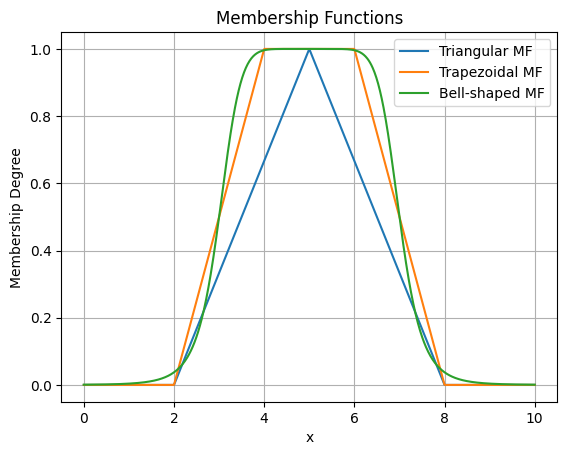

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Triangular Membership Function
def triangular_mf(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

# Trapezoidal Membership Function
def trapezoidal_mf(x, a, b, c, d):
    return np.maximum(0, np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)))

# Bell-shaped Membership Function
def bell_shaped_mf(x, a, b, c):
    return 1 / (1 + np.abs((x-c)/a)**(2*b))

# Generate values for x
x = np.linspace(0, 10, 1000)

# Plot Triangular Membership Function
tri_mf = triangular_mf(x, 2, 5, 8)
plt.plot(x, tri_mf, label='Triangular MF')

# Plot Trapezoidal Membership Function
trap_mf = trapezoidal_mf(x, 2, 4, 6, 8)
plt.plot(x, trap_mf, label='Trapezoidal MF')

# Plot Bell-shaped Membership Function
bell_mf = bell_shaped_mf(x, 2, 4, 5)
plt.plot(x, bell_mf, label='Bell-shaped MF')

# Show plot
plt.title('Membership Functions')
plt.xlabel('x')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()


**(10) Implementation of Mamdani-Type Fuzzy Inference System for Heater Power Control.**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define linguistic variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
heater_power = ctrl.Consequent(np.arange(0, 101, 1), 'heater_power')

# Define membership functions
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['warm'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['hot'] = fuzz.trimf(temperature.universe, [50, 100, 100])

heater_power['low'] = fuzz.trimf(heater_power.universe, [0, 0, 50])
heater_power['medium'] = fuzz.trimf(heater_power.universe, [0, 50, 100])
heater_power['high'] = fuzz.trimf(heater_power.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'], heater_power['high'])
rule2 = ctrl.Rule(temperature['warm'], heater_power['medium'])
rule3 = ctrl.Rule(temperature['hot'], heater_power['low'])

# Create fuzzy inference system
temperature_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
heater_power_ctrl = ctrl.ControlSystemSimulation(temperature_ctrl)

# Input value
heater_power_ctrl.input['temperature'] = 75

# Compute output
heater_power_ctrl.compute()

# Output
print("Heater Power:", heater_power_ctrl.output['heater_power'])

Heater Power: 44.04761904761905


**(11) Implementation of Neuro-Fuzzy Hybrid System for Predicting Fan Speed Based on Temperature and Humidity**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 582.5528
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 502.0456 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 410.7259 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 332.9088 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 271.1404 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 232.5441 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 195.8061 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181.6283  
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148.4610 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150.1313 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116.1271
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.0188 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132.2001 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.6735 
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

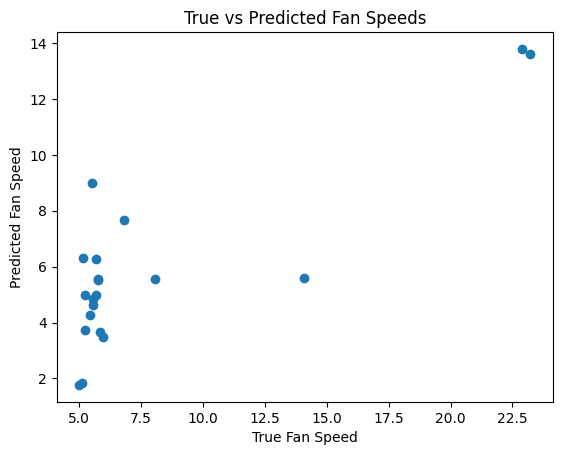

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Step 1: Define Fuzzy Variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 31, 1), 'fan_speed')

# Define membership functions for temperature
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['medium'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['high'] = fuzz.trimf(temperature.universe, [20, 40, 40])

# Define membership functions for humidity
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Define membership functions for fan speed
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 15])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [10, 15, 20])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [15, 30, 30])

# Step 2: Define fuzzy rules
rule1 = ctrl.Rule(temperature['high'] & humidity['low'], fan_speed['high'])
rule2 = ctrl.Rule(temperature['medium'] & humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['low'] | humidity['high'], fan_speed['low'])

# Control System
fan_control = ctrl.ControlSystem([rule1, rule2, rule3])
fan_simulation = ctrl.ControlSystemSimulation(fan_control)

# Step 3: Generate Training Data (Synthetic)
data_size = 100
temperature_data = np.random.randint(0, 41, data_size)
humidity_data = np.random.randint(0, 101, data_size)
fan_speeds = []

# Simulate fuzzy system for generating training data
for temp, hum in zip(temperature_data, humidity_data):
    fan_simulation.input['temperature'] = temp
    fan_simulation.input['humidity'] = hum
    try:
        fan_simulation.compute()
        fan_speeds.append(fan_simulation.output['fan_speed'])
    except KeyError:
        # In case the fuzzy system does not compute a result, handle it here
        fan_speeds.append(0)  # Set a default value or handle appropriately

# Convert to arrays
fan_speeds = np.array(fan_speeds)

# Split data into training and testing sets
X = np.vstack((temperature_data, humidity_data)).T
y = fan_speeds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Simple Neural Network
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))  # Input layer for temperature and humidity
model.add(Dense(10, activation='relu'))               # Hidden layer
model.add(Dense(1, activation='linear'))              # Output layer for fan speed

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Step 5: Plot the results
predicted_fan_speeds = model.predict(X_test)

plt.scatter(y_test, predicted_fan_speeds)
plt.xlabel('True Fan Speed')
plt.ylabel('Predicted Fan Speed')
plt.title('True vs Predicted Fan Speeds')
plt.show()


**(12) Use a genetic algorithm to find the maximum number of 1's in a binary string of fixed length (also known as the "One-Max Problem").**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import numpy as np

# Parameters
population_size = 10
chromosome_length = 8
generations = 50
p_c = 0.7  # Crossover probability
p_m = 0.01 # Mutation probability

# Generate Initial Population
def initialize_population(size, length):
    return np.random.randint(2, size=(size, length))

# Fitness Function
def fitness(chromosome):
    return np.sum(chromosome)  # Count of 1's

# Selection using Roulette Wheel
def roulette_wheel_selection(population, fitness_values):
    total_fitness = np.sum(fitness_values)
    selection_probs = fitness_values / total_fitness
    selected_idx = np.random.choice(len(population), p=selection_probs)
    return population[selected_idx]

# Crossover
def crossover(parent1, parent2, p_c):
    if np.random.rand() < p_c:
        point = np.random.randint(1, len(parent1) - 1)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    return parent1, parent2

# Mutation
def mutate(chromosome, p_m):
    for i in range(len(chromosome)):
        if np.random.rand() < p_m:
            chromosome[i] = 1 - chromosome[i]  # Flip bit
    return chromosome

# Genetic Algorithm
population = initialize_population(population_size, chromosome_length)

for gen in range(generations):
    fitness_values = np.array([fitness(chrom) for chrom in population])

    # Display progress
    print(f"Generation {gen + 1}: Max Fitness = {np.max(fitness_values)}")

    new_population = []

    # Create new population
    for _ in range(population_size // 2):
        parent1 = roulette_wheel_selection(population, fitness_values)
        parent2 = roulette_wheel_selection(population, fitness_values)

        # Crossover
        child1, child2 = crossover(parent1, parent2, p_c)

        # Mutation
        child1 = mutate(child1, p_m)
        child2 = mutate(child2, p_m)

        new_population.extend([child1, child2])

    population = np.array(new_population)

# Final Results
final_fitness = np.array([fitness(chrom) for chrom in population])
print("Final population fitness:", final_fitness)
print("Best solution:", population[np.argmax(final_fitness)])


Generation 1: Max Fitness = 5
Generation 2: Max Fitness = 5
Generation 3: Max Fitness = 5
Generation 4: Max Fitness = 5
Generation 5: Max Fitness = 5
Generation 6: Max Fitness = 5
Generation 7: Max Fitness = 5
Generation 8: Max Fitness = 5
Generation 9: Max Fitness = 5
Generation 10: Max Fitness = 5
Generation 11: Max Fitness = 6
Generation 12: Max Fitness = 6
Generation 13: Max Fitness = 6
Generation 14: Max Fitness = 6
Generation 15: Max Fitness = 6
Generation 16: Max Fitness = 6
Generation 17: Max Fitness = 6
Generation 18: Max Fitness = 6
Generation 19: Max Fitness = 6
Generation 20: Max Fitness = 6
Generation 21: Max Fitness = 6
Generation 22: Max Fitness = 6
Generation 23: Max Fitness = 6
Generation 24: Max Fitness = 6
Generation 25: Max Fitness = 6
Generation 26: Max Fitness = 6
Generation 27: Max Fitness = 6
Generation 28: Max Fitness = 6
Generation 29: Max Fitness = 6
Generation 30: Max Fitness = 6
Generation 31: Max Fitness = 6
Generation 32: Max Fitness = 6
Generation 33: Ma

**(13) Implementation of Fuzzy Logic-Based Tip Recommendation System for Dining Experience.
Use Fuzzy toolbox to model tip value that is given after a dinner which can be-not good,satisfying,good and delightful and service which is poor,average or good and the tip value will range from Rs. 10 to 100.**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

Recommended tip value: 62.90243902439022


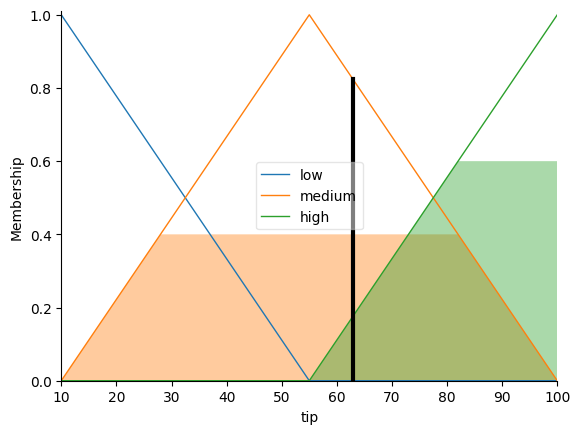

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define linguistic variables
satisfaction = ctrl.Antecedent(np.arange(0, 11, 1), 'satisfaction')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 101, 1), 'tip')

# Define membership functions for satisfaction
satisfaction['not_good'] = fuzz.trimf(satisfaction.universe, [0, 0, 5])
satisfaction['satisfying'] = fuzz.trimf(satisfaction.universe, [0, 5, 10])
satisfaction['good'] = fuzz.trimf(satisfaction.universe, [5, 10, 10])
satisfaction['delightful'] = fuzz.trimf(satisfaction.universe, [10, 10, 10])

# Define membership functions for service
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

# Define membership functions for tip
tip['low'] = fuzz.trimf(tip.universe, [10, 10, 55])
tip['medium'] = fuzz.trimf(tip.universe, [10, 55, 100])
tip['high'] = fuzz.trimf(tip.universe, [55, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(satisfaction['not_good'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(satisfaction['satisfying'] & service['average'], tip['medium'])
rule3 = ctrl.Rule(satisfaction['good'] | service['good'], tip['high'])
rule4 = ctrl.Rule(satisfaction['delightful'] & service['good'], tip['high'])

# Create fuzzy inference system
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
tip_sim = ctrl.ControlSystemSimulation(tip_ctrl)

# Input values (example: satisfaction=7, service=8)
tip_sim.input['satisfaction'] = 7
tip_sim.input['service'] = 8

# Compute output
tip_sim.compute()

# Output
print("Recommended tip value:", tip_sim.output['tip'])
tip.view(sim=tip_sim)


**(14) Implementing Fuzzy Logic-Based Traffic Light Control System.**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

Recommended Traffic Light Duration: 31.231884057971016


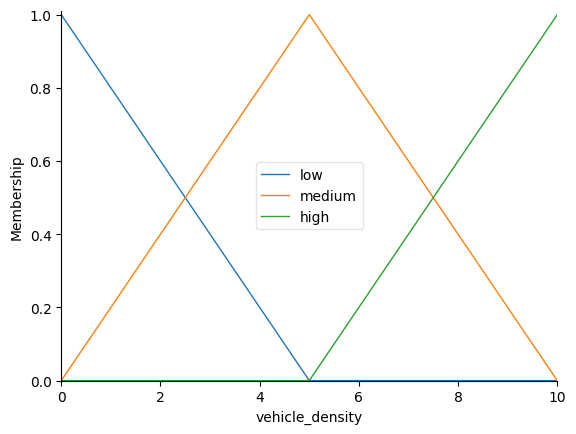

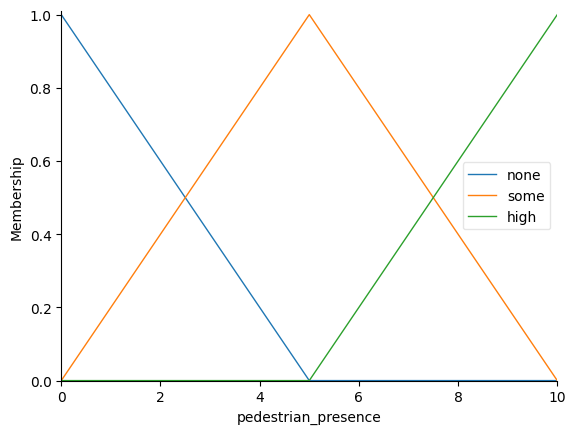

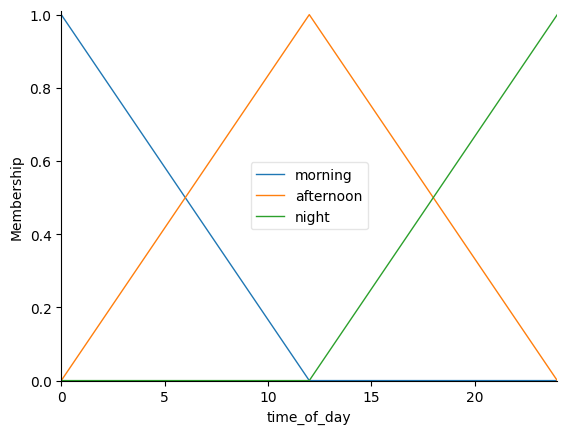

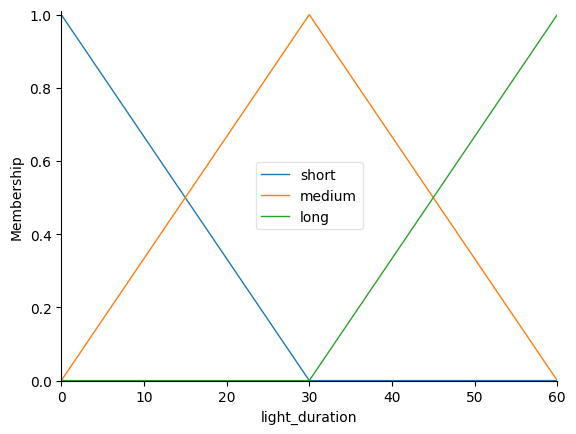

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
vehicle_density = ctrl.Antecedent(np.arange(0, 11, 1), 'vehicle_density')
pedestrian_presence = ctrl.Antecedent(np.arange(0, 11, 1), 'pedestrian_presence')
time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), 'time_of_day')
light_duration = ctrl.Consequent(np.arange(0, 61, 1), 'light_duration')

# Define membership functions
vehicle_density['low'] = fuzz.trimf(vehicle_density.universe, [0, 0, 5])
vehicle_density['medium'] = fuzz.trimf(vehicle_density.universe, [0, 5, 10])
vehicle_density['high'] = fuzz.trimf(vehicle_density.universe, [5, 10, 10])

pedestrian_presence['none'] = fuzz.trimf(pedestrian_presence.universe, [0, 0, 5])
pedestrian_presence['some'] = fuzz.trimf(pedestrian_presence.universe, [0, 5, 10])
pedestrian_presence['high'] = fuzz.trimf(pedestrian_presence.universe, [5, 10, 10])

time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [0, 0, 12])
time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [0, 12, 24])
time_of_day['night'] = fuzz.trimf(time_of_day.universe, [12, 24, 24])

light_duration['short'] = fuzz.trimf(light_duration.universe, [0, 0, 30])
light_duration['medium'] = fuzz.trimf(light_duration.universe, [0, 30, 60])
light_duration['long'] = fuzz.trimf(light_duration.universe, [30, 60, 60])

# Define fuzzy rules
rule1 = ctrl.Rule(vehicle_density['low'] &pedestrian_presence['none'] &time_of_day['morning'], light_duration['long'])
rule2 = ctrl.Rule(vehicle_density['medium'] &pedestrian_presence['none'] &time_of_day['morning'], light_duration['medium'])
rule3 = ctrl.Rule(vehicle_density['high'] &pedestrian_presence['none'] &time_of_day['morning'], light_duration['short'])

# Create control system
traffic_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
traffic_light = ctrl.ControlSystemSimulation(traffic_ctrl)

# Input values
traffic_light.input['vehicle_density'] = 3
traffic_light.input['pedestrian_presence'] = 0
traffic_light.input['time_of_day'] = 10

# Compute output
traffic_light.compute()

# Output
print("Recommended Traffic Light Duration:", traffic_light.output['light_duration'])

# Visualization (Optional)
vehicle_density.view()
pedestrian_presence.view()
time_of_day.view()
light_duration.view()


**(15) Knapsack Problem**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import random
import numpy as np

# Problem definition
items = [
    {"weight": 10, "value": 60},
    {"weight": 20, "value": 100},
    {"weight": 30, "value": 120}
]
max_weight = 50
population_size = 6
generations = 50
mutation_rate = 0.1

# Fitness function
def fitness(individual):
    total_weight = sum(ind["weight"] * gene for ind, gene in zip(items, individual))
    total_value = sum(ind["value"] * gene for ind, gene in zip(items, individual))
    return total_value if total_weight <= max_weight else 0

# Generate initial population
def generate_individual():
    return [random.randint(0, 1) for _ in range(len(items))]

def generate_population(size):
    return [generate_individual() for _ in range(size)]

# Selection
def selection(population):
    fitnesses = [fitness(ind) for ind in population]
    probabilities = [f / sum(fitnesses) for f in fitnesses]
    return population[np.random.choice(len(population), p=probabilities)]

# Crossover
def crossover(parent1, parent2):
    point = random.randint(1, len(items) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutation
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

# Genetic Algorithm
population = generate_population(population_size)
for gen in range(generations):
    new_population = []
    for _ in range(population_size // 2):
        parent1 = selection(population)
        parent2 = selection(population)
        child1, child2 = crossover(parent1, parent2)
        new_population.extend([mutate(child1), mutate(child2)])
    population = new_population

# Get the best solution
best_individual = max(population, key=fitness)
print("Best solution:", best_individual)
print("Best value:", fitness(best_individual))



Best solution: [0, 1, 1]
Best value: 220


**(16) Creating a face recognition system with a genetic neuro-hybrid approach involves combining neural networks for feature extraction and a genetic algorithm for optimizing parameters (such as weights, thresholds, or architecture).**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate a simple dataset (face-like images with 3 features: nose, eyes, mouth)
# Each feature is binary (1 or 0)
X = np.array([
    [1, 1, 1],  # Face 1
    [1, 0, 1],  # Face 2
    [0, 1, 1],  # Face 3
    [0, 0, 1],  # Face 4
])
y = np.array([0, 1, 2, 3])  # Labels for faces

# Neural Network Parameters
input_size = 3
hidden_size = 4
output_size = 4
population_size = 10
num_generations = 20
mutation_rate = 0.1

# Activation Function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fitness Function
def fitness(weights):
    input_hidden = weights[:input_size * hidden_size].reshape(input_size, hidden_size)
    hidden_output = weights[input_size * hidden_size:].reshape(hidden_size, output_size)

    # Forward Propagation
    hidden_layer = sigmoid(np.dot(X, input_hidden))
    output_layer = sigmoid(np.dot(hidden_layer, hidden_output))

    predictions = np.argmax(output_layer, axis=1)
    accuracy = np.mean(predictions == y)  # Fitness is based on classification accuracy
    return accuracy

# Generate Initial Population
def initialize_population():
    return [np.random.uniform(-1, 1, input_size * hidden_size + hidden_size * output_size) for _ in range(population_size)]

# Selection
def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    selection_probs = [score / total_fitness for score in fitness_scores]
    parents = random.choices(population, weights=selection_probs, k=2)
    return parents

# Crossover
def crossover(parent1, parent2):
    point = random.randint(0, len(parent1) - 1)
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# Mutation
def mutate(chromosome):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] += np.random.uniform(-0.5, 0.5)
    return chromosome

# Genetic Algorithm
def genetic_algorithm():
    population = initialize_population()

    for generation in range(num_generations):
        fitness_scores = [fitness(ind) for ind in population]

        # Best individual
        best_individual = population[np.argmax(fitness_scores)]
        best_fitness = max(fitness_scores)

        print(f"Generation {generation+1} - Best Fitness: {best_fitness:.4f}")

        # Selection and Reproduction
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population

    return best_individual

# Train Genetic Algorithm
best_weights = genetic_algorithm()

# Test Neural Network with Optimized Weights
input_hidden = best_weights[:input_size * hidden_size].reshape(input_size, hidden_size)
hidden_output = best_weights[input_size * hidden_size:].reshape(hidden_size, output_size)

hidden_layer = sigmoid(np.dot(X, input_hidden))
output_layer = sigmoid(np.dot(hidden_layer, hidden_output))

print("\nPredictions:")
predictions = np.argmax(output_layer, axis=1)
print("Predicted Labels:", predictions)
print("Actual Labels:   ", y)


Generation 1 - Best Fitness: 0.2500
Generation 2 - Best Fitness: 0.2500
Generation 3 - Best Fitness: 0.2500
Generation 4 - Best Fitness: 0.2500
Generation 5 - Best Fitness: 0.2500
Generation 6 - Best Fitness: 0.2500
Generation 7 - Best Fitness: 0.2500
Generation 8 - Best Fitness: 0.5000
Generation 9 - Best Fitness: 0.5000
Generation 10 - Best Fitness: 0.2500
Generation 11 - Best Fitness: 0.2500
Generation 12 - Best Fitness: 0.5000
Generation 13 - Best Fitness: 0.2500
Generation 14 - Best Fitness: 0.7500
Generation 15 - Best Fitness: 0.5000
Generation 16 - Best Fitness: 0.7500
Generation 17 - Best Fitness: 0.5000
Generation 18 - Best Fitness: 0.5000
Generation 19 - Best Fitness: 0.5000
Generation 20 - Best Fitness: 0.5000

Predictions:
Predicted Labels: [2 1 2 1]
Actual Labels:    [0 1 2 3]


**(17) Face Recognition using Genetic Algorithm Optimized Neural Networks on the Labeled Faces in the Wild (LFW).**

Name- Sanskar Vaibhav
Adm.No.- 22SCSE1180236

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import random

# Fetch LFW dataset
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.4)
X = lfw.data  # Flattened pixel data
y = lfw.target  # Labels (person IDs)
target_names = lfw.target_names

# Visualize a few faces
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(lfw.images[i], cmap='gray')
    ax.set_title(target_names[y[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Genetic Algorithm Parameters
input_size = X_train.shape[1]
hidden_size = 100  # Number of neurons in the hidden layer
output_size = len(target_names)
population_size = 10
num_generations = 20
mutation_rate = 0.1

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fitness function to evaluate population
def fitness(weights, X_train, y_train):
    input_hidden = weights[:input_size * hidden_size].reshape(input_size, hidden_size)
    hidden_output = weights[input_size * hidden_size:].reshape(hidden_size, output_size)

    hidden_layer = sigmoid(np.dot(X_train, input_hidden))
    output_layer = sigmoid(np.dot(hidden_layer, hidden_output))

    predictions = np.argmax(output_layer, axis=1)
    return accuracy_score(y_train, predictions)

# Initialize Population
def initialize_population():
    return [np.random.uniform(-1, 1, input_size * hidden_size + hidden_size * output_size) for _ in range(population_size)]

# Selection
def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    selection_probs = [score / total_fitness for score in fitness_scores]
    parents = random.choices(population, weights=selection_probs, k=2)
    return parents

# Crossover
def crossover(parent1, parent2):
    point = random.randint(0, len(parent1) - 1)
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# Mutation
def mutate(chromosome):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] += np.random.uniform(-0.5, 0.5)
    return chromosome

# Genetic Algorithm
def genetic_algorithm(X_train, y_train):
    population = initialize_population()
    best_fitness_over_generations = []

    for generation in range(num_generations):
        fitness_scores = [fitness(ind, X_train, y_train) for ind in population]

        # Best individual
        best_individual = population[np.argmax(fitness_scores)]
        best_fitness = max(fitness_scores)
        best_fitness_over_generations.append(best_fitness)

        print(f"Generation {generation+1} - Best Fitness: {best_fitness:.4f}")

        # Selection and Reproduction
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population

    return best_individual, best_fitness_over_generations

# Run Genetic Algorithm
best_weights, fitness_history = genetic_algorithm(X_train, y_train)

# Plot fitness over generations
plt.plot(fitness_history, marker='o')
plt.title('Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness (Accuracy)')
plt.grid()
plt.show()

# Test Optimized Weights
input_hidden = best_weights[:input_size * hidden_size].reshape(input_size, hidden_size)
hidden_output = best_weights[input_size * hidden_size:].reshape(hidden_size, output_size)

hidden_layer = sigmoid(np.dot(X_test, input_hidden))
output_layer = sigmoid(np.dot(hidden_layer, hidden_output))

predictions = np.argmax(output_layer, axis=1)
test_accuracy = accuracy_score(y_test, predictions)

print(f"Test Accuracy: {test_accuracy:.4f}")